<a href="https://colab.research.google.com/github/dhy02094/STUDY_TH/blob/master/data_augmentation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
# CIFAR-100
from tensorflow.keras.datasets.cifar100 import load_data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

169017344/169001437 [==============================] - 9s 0us/step


In [ ]:
import matplotlib.pyplot as plt
import random

클래스 [92]번


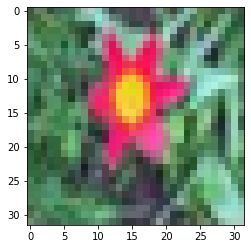

In [ ]:
### 반복실행
idx = random.randint(0,49999)
print("클래스 {}번".format(y_train[idx]))
plt.imshow(x_train[idx])
plt.show()

# Q1. X : min-max scaling 해보자

**함수를 제작하여 사용해볼 것**

In [ ]:
###############################
## Your code here : Function ##
###############################
# max_ = x_train.max()

# x_train = x_train/max_
# x_test = x_test/max_

def minmax_scale(대상, max_):
    대상 = 대상/max_
    return 대상

In [ ]:
##############################
## Your code here : Scaling ##
##############################
max_ = x_train.max()
x_train = minmax_scale(x_train, max_)
x_test = minmax_scale(x_test, max_)


# Q.2. Y : 원 핫 인코딩 해보자

In [ ]:
y_train[1]

array([29])

In [ ]:
##############################
## Your code here : Scaling ##
##############################
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test,100)


# 모델링!

Sequential, 모든 activation은 'swish'

**모델구조.**

1. 인풋레이어


2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 20% 비활성화


8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
2. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 30% 비활성화


14. Convolution : 필터수 96개, 사이즈(3, 3), same padding
3. BatchNormalization
2. Convolution : 필터수 96개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 40% 비활성화


20. Convolution : 필터수 128개, 사이즈(3, 3), same padding
3. BatchNormalization
2. Convolution : 필터수 128개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 40% 비활성화


26. Flatten()
9. 아웃풋레이어

In [ ]:
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, MaxPool2D
from keras.models import Sequential

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
####################
## Your code here ## 
####################
keras.backend.clear_session()

model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(96, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='swish'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

# 데이터 Augmentation

1. 회전 : 30도
2. shifting : 20%
3. 줌 : 30%
4. 플립 : True

In [ ]:
####################
## Your code here ## 
####################

# 1번. 데이터 제너레이터 가져오기
from keras.preprocessing.image import ImageDataGenerator

# 2번. 오그멘테이션 규칙 지정 & 선언
datagen = ImageDataGenerator(
          featurewise_center=False,
          samplewise_center=False,
          featurewise_std_normalization=False,
          samplewise_std_normalization=False,
          zca_whitening=True,
          rotation_range=30,
          zoom_range = 0.3,
          width_shift_range=0.2,
          height_shift_range=0.2,
          horizontal_flip=True,
          vertical_flip=True)

# 3번. 규칙을 찾을 소스를 지정해줌
datagen.fit(x_train)

# 4번. 실시간 데이터 오그멘테이션을 위한 설정 & 선언
train_gen = datagen.flow(x_train, y_train, batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# 얼리 스토핑을 이용한 학습.

1. Early Stopping
    * validation loss를 모니터링 할 것
    * 8번 안에 개선이 없다면 멈출 것
    * 성능이 유지만 되어도 개선되었다고 정의
    * verbose 1
    * 학습 멈춘 후, 가장 성능 좋았을 때 가중치 복구
1. epochs는 10000
2. batch_size는 64 ( augmentation )
3. 벨리데이션셋에는 트레이닝셋 원본

In [ ]:
####################
## Your code here ## 
####################

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=8, verbose=1, restore_best_weights=True)

model.fit(train_gen, epochs = 100000,
          validation_data=(x_train, y_train), verbose = 1, callbacks=[es], batch_size=64)

Epoch 1/100000
391/391 [==============================] - 187s 450ms/step - loss: 4.8683 - accuracy: 0.0309 - val_loss: 10.4273 - val_accuracy: 0.0068
Epoch 2/100000
391/391 [==============================] - 155s 396ms/step - loss: 4.2562 - accuracy: 0.0773 - val_loss: 5.9433 - val_accuracy: 0.0130
Epoch 3/100000
391/391 [==============================] - 158s 404ms/step - loss: 3.9304 - accuracy: 0.1163 - val_loss: 6.7045 - val_accuracy: 0.0158
Epoch 4/100000
391/391 [==============================] - 161s 411ms/step - loss: 3.7415 - accuracy: 0.1432 - val_loss: 7.2810 - val_accuracy: 0.0147
Epoch 5/100000
391/391 [==============================] - 160s 409ms/step - loss: 3.5661 - accuracy: 0.1656 - val_loss: 8.0005 - val_accuracy: 0.0141
Epoch 6/100000
391/391 [==============================] - 162s 413ms/step - loss: 3.4301 - accuracy: 0.1867 - val_loss: 7.4144 - val_accuracy: 0.0102
Epoch 7/100000
391/391 [==============================] - 159s 407ms/step - loss: 3.3032 - accuracy